In [1]:
import pandas as pd
import numpy as np


In [3]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/csv/predictive_maintenance.csv")
data.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
data.isna().sum() #calculates NaN values

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [5]:
data.duplicated().sum() #checks for duplicated rows

0

In [6]:
data.columns[:2] #displays first two columns

Index(['UDI', 'Product ID'], dtype='object')

In [7]:
data.drop(data.columns[:2] , axis = 1, inplace = True) #drops first two colums
obj_col = data.select_dtypes(include = 'O').columns.tolist() #creates a list of column names that are of object data type and converts them to a list.
obj_col # Print the list of column name

['Type', 'Failure Type']

In [8]:
for col in obj_col : #counts the number of occurrences of each unique value in a column.
    print(data[col].value_counts())

L    6000
M    2997
H    1003
Name: Type, dtype: int64
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64


In [9]:
data_f = data[data.Target == 1] # filter  to only include rows where the value in the Target column is equal to 1
data_f['Failure Type'].value_counts()

Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: Failure Type, dtype: int64

In [10]:
data_f[data_f['Failure Type'] == 'No Failure']

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1437,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,L,297.2,308.1,1431,49.7,210,1,No Failure


In [11]:
idx = data_f[data_f['Failure Type'] == 'No Failure'].index #filters the data to only include rows where the value in the Failure Type column is equal to no failure


In [12]:
data.drop(idx, axis =0 ,inplace = True ) #drops no failure rows

In [13]:
data_f = data[data.Target == 0]
data_f['Failure Type'].value_counts()

No Failure         9643
Random Failures      18
Name: Failure Type, dtype: int64

In [14]:
idx = data_f[data_f['Failure Type'] == 'Random Failures'].index
data.drop(idx , axis =0 , inplace = True )

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     9973 non-null   object 
 1   Air temperature [K]      9973 non-null   float64
 2   Process temperature [K]  9973 non-null   float64
 3   Rotational speed [rpm]   9973 non-null   int64  
 4   Torque [Nm]              9973 non-null   float64
 5   Tool wear [min]          9973 non-null   int64  
 6   Target                   9973 non-null   int64  
 7   Failure Type             9973 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 701.2+ KB


In [16]:
num_cols = data.select_dtypes(exclude = 'O').columns.tolist()
num_cols

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target']

In [17]:
for i , col in enumerate(num_cols,1):
    print(i , col)

1 Air temperature [K]
2 Process temperature [K]
3 Rotational speed [rpm]
4 Torque [Nm]
5 Tool wear [min]
6 Target


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

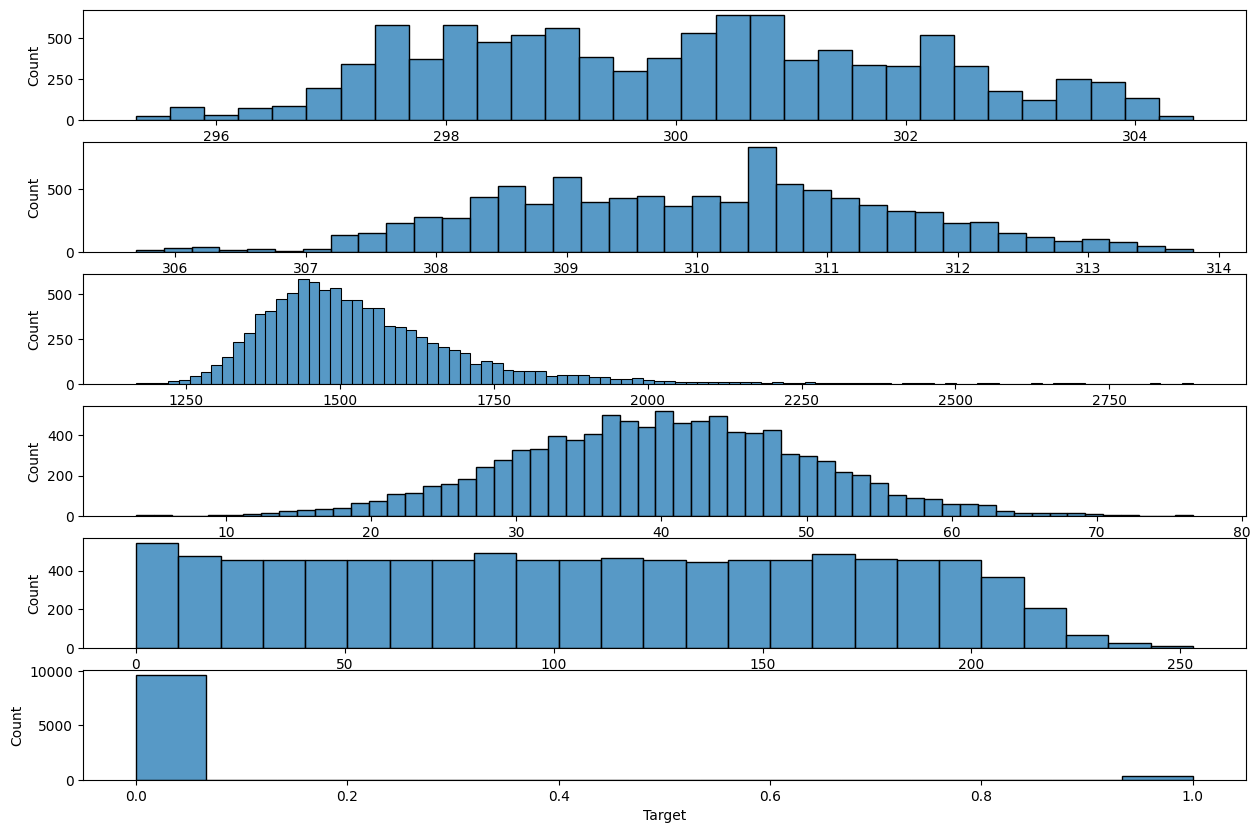

In [19]:
plt.figure(figsize = (15 , 10))
for i , col in enumerate(num_cols,1):
    plt.subplot(6,1,i)
    sns.histplot(data = data , x= col)

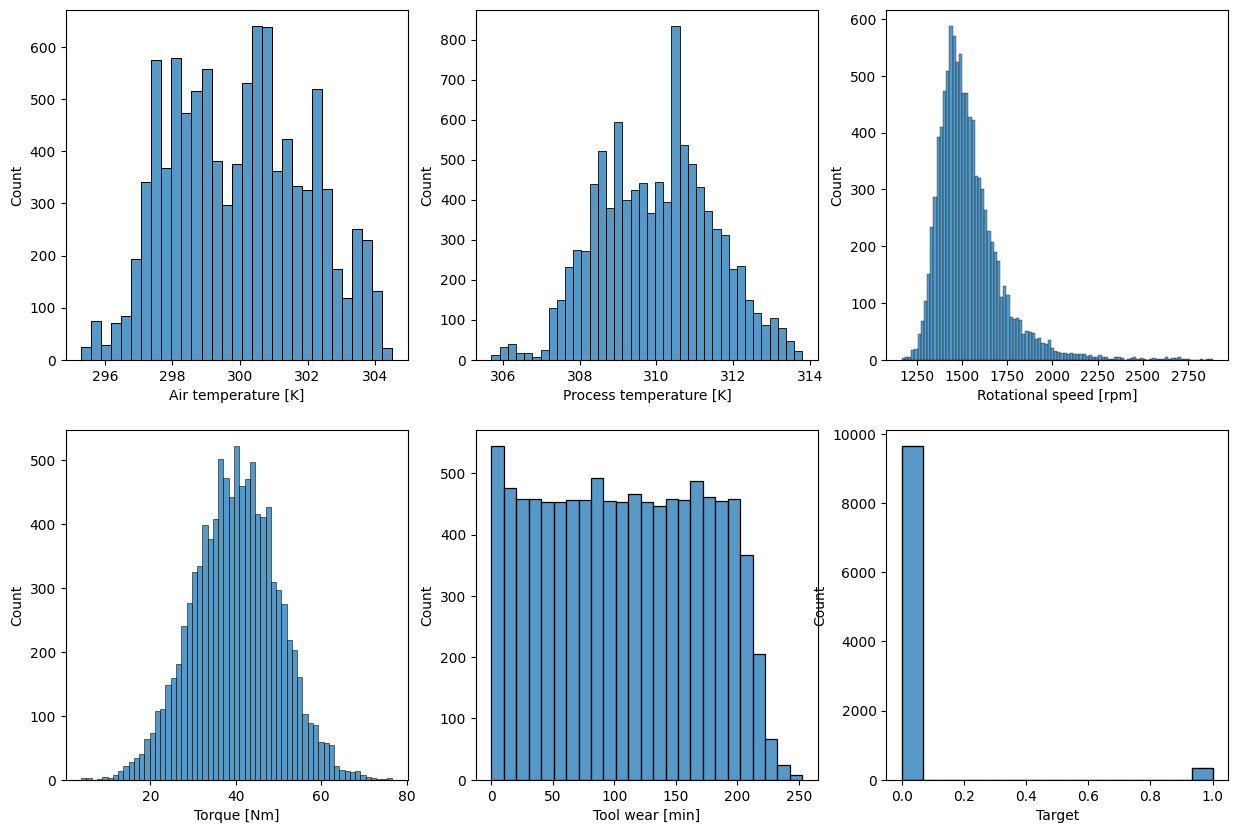

In [20]:
plt.figure(figsize = (15 , 10))
for i , col in enumerate(num_cols,1):
    plt.subplot(2,3,i)
    sns.histplot(data = data , x= col)

In [31]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [32]:
data.columns[-2:]

Index(['Target', 'Failure Type'], dtype='object')

In [33]:
x = data.drop(data.columns[-2:] , axis = 1 )
y = data['Target']

In [42]:
data_encoded = pd.get_dummies(data['Type'])
x = pd.get_dummies(x, columns=['Type'], drop_first=True)



In [43]:
print(x)

      Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                   298.1                    308.6                    1551   
1                   298.2                    308.7                    1408   
2                   298.1                    308.5                    1498   
3                   298.2                    308.6                    1433   
4                   298.2                    308.7                    1408   
...                   ...                      ...                     ...   
9995                298.8                    308.4                    1604   
9996                298.9                    308.4                    1632   
9997                299.0                    308.6                    1645   
9998                299.0                    308.7                    1408   
9999                299.0                    308.7                    1500   

      Torque [Nm]  Tool wear [min]  Type_L  Type_M  
0         

In [26]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Target, Length: 9973, dtype: int64


In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9744360902255639
Confusion Matrix:
 [[1933    3]
 [  48   11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1936
           1       0.79      0.19      0.30        59

    accuracy                           0.97      1995
   macro avg       0.88      0.59      0.64      1995
weighted avg       0.97      0.97      0.97      1995



In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Precision: 0.7857142857142857
Recall: 0.1864406779661017
F1 Score: 0.3013698630136986
